In [ ]:
# v3-32
    # [1, 32, 1], query_block_size=None percore=1。time: 0.0748
    # [1, 32, 1], query_block_size=64 percore=1。time: 0.0699
    # [1, 32, 1], query_block_size=128 percore=1。time: 0.0791
    # [1, 32, 1], query_block_size=256 percore=1。time: 0.0796
    # [1, 32, 1], query_block_size=512 percore=1。time: 0.0806
    # [1, 32, 1], query_block_size=1024 percore=1。time: 0.0815
    # [1, 32, 1], query_block_size=2048 percore=1。time: 0.0786

    # [1, 16, 2], query_block_size=None percore=1。0.0684
    # [1, 16, 2], query_block_size=64 percore=1。time: 0.0656
    # [1, 16, 2], query_block_size=128 percore=1。time: 0.0656
    # [1, 16, 2], query_block_size=256 percore=1。time: 0.0753
    # [1, 16, 2], query_block_size=512 percore=1。time: 0.0753
    # [1, 16, 2], query_block_size=1024 percore=1。time: 0.0759
    # [1, 16, 2], query_block_size=2048 percore=1。time: 0.0734


    # [1, 8, 4], query_block_size=None percore=1。time: 0.0694
    # [1, 8, 4], query_block_size=512 percore=1。time: 0.0793

    # [1, 4, 8], query_block_size=None percore=1。time: 0.0677
    # [1, 4, 8], query_block_size=512 percore=1。time: 0.074

    # [1, 2, 16], query_block_size=None percore=1。time: 0.0504
    # [1, 2, 16], query_block_size=512 percore=1。time: 0.0555

    # [1, 1, 32], query_block_size=None percore=1。time: 0.0312
    # [1, 1, 32], query_block_size=512 percore=1。time: 0.0334
    
    
# v3-128 [1, 128, 1], query_block_size=512, percore=4。time:26.07G
    # v3-128 [1, 128, 1], query_block_size=512, percore=3。time:21.03G
    # v3-128 [1, 128, 1], query_block_size=512,percore=2。time: 5.99G

    # v3-128 [1, 64, 2], query_block_size=512，percore=4。time: 超4.32G
    # v3-128 [1, 64, 2], query_block_size=256, percore=4。time: 超4.19G # embedding_lookup.emb_lookup
    # v3-128 [1, 64, 2], query_block_size=512, percore=3。time: 超1.02G # embedding_lookup.emb_lookup

    # v3-128 [1, 32, 4], query_block_size=512，percore=3。time: 0.02743
    # v3-128 [1, 32, 4], query_block_size=512，percore=4。time: 0.02067
    # v3-128 [1, 32, 4], query_block_size=256。percore=4。time: 0.02000
    # v3-128 [1, 32, 4], query_block_size=1024，percore=4。time: 10?
    # v3-128 [1, 32, 4], query_block_size=2048=4。time: 11?

    # v3-128 [1, 128, 1], query_block_size=None, percore=1。time:0.0727
    # v3-128 [1, 64, 2], query_block_size=None, percore=1。time: 0.0687
    # v3-128 [1, 32, 4], query_block_size=None, percore=1。time: 0.0675
    # v3-128 [1, 16, 8], query_block_size=None, percore=1。time: 0.0639
    # v3-128 [1, 8, 16], query_block_size=None, percore=1。time: 0.0472
    # v3-128 [1, 4, 32], query_block_size=None, percore=1。time: 0.0242
    # v3-128 [1, 2, 64], query_block_size=None, percore=1。time: 
    # v3-128 [1, 1, 128], query_block_size=None, percore=1。time: 
   

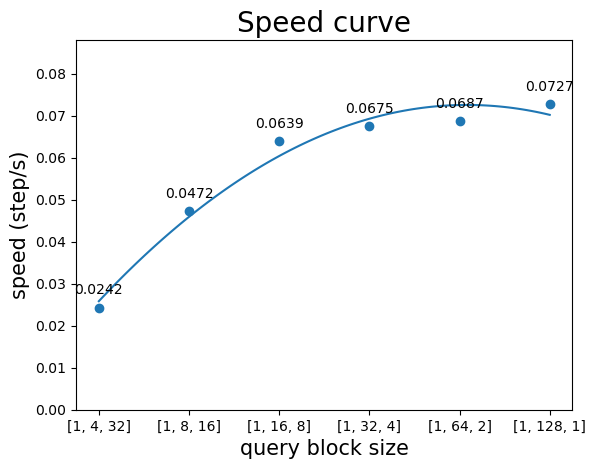

In [2]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

xlabels = ['[1, 4, 32]', '[1, 8, 16]', '[1, 16, 8]', '[1, 32, 4]', '[1, 64, 2]', '[1, 128, 1]']
x = range(len(xlabels))
y = [0.0242, 0.0472, 0.0639, 0.0675, 0.0687, 0.0727]

coefficients = np.polyfit(x, y, 2) # 2表示2次项拟合
p = np.poly1d(coefficients)
x_fit = np.linspace(min(x), max(x), 100)
y_fit = p(x_fit)


fig, ax = plt.subplots()

ax.scatter(xlabels, y)
ax.plot(x_fit, y_fit)

for index_to_label in range(len(x)):
    plt.annotate(f'{y[index_to_label]}',
                 (x[index_to_label], y[index_to_label]),
                 textcoords="offset points", xytext=(0,10), ha='center')

ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels)
# ax.set_xlim(-1, 7)
ax.set_ylim(0, 0.088)

ax.set_title('Speed curve', fontsize=20)
ax.set_xlabel('query block size', fontsize=15)
ax.set_ylabel('speed (step/s)', fontsize=15)
# ax.legend(['v3-32', 'v3-32-fit', 'v3-128', 'v3-128-fit'], loc='right')

plt.show()


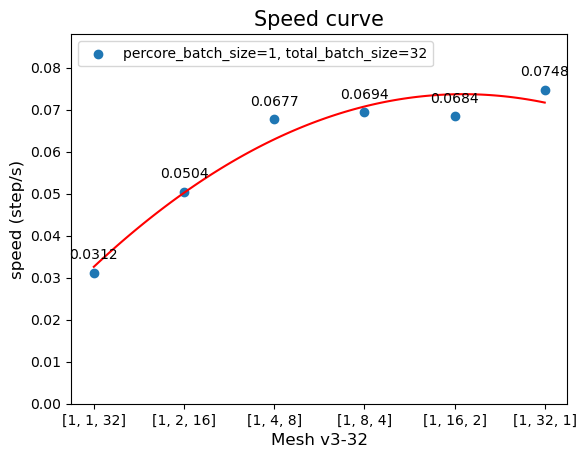

In [19]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


xlabels = ['[1, 1, 32]', '[1, 2, 16]', '[1, 4, 8]', '[1, 8, 4]', '[1, 16, 2]', '[1, 32, 1]']
x = range(len(xlabels))
y = [0.0312, 0.0504, 0.0677, 0.0694, 0.0684, 0.0748]
# y1 = [0.0220, 0.02654, 0.02707, 0.02747, 0.02729, 0.02709, 0.0229]

coefficients = np.polyfit(x, y, 2) # 2表示2次项拟合
p = np.poly1d(coefficients)
x_fit = np.linspace(min(x), max(x), 100)
y_fit = p(x_fit)

# coefficients = np.polyfit(x, y1, 2) # 2表示2次项拟合
# p = np.poly1d(coefficients)
# x_fit1 = np.linspace(min(x), max(x), 100)
# y_fit1 = p(x_fit1)

fig, ax = plt.subplots()

ax.scatter(xlabels, y)
ax.plot(x_fit, y_fit)

# ax.scatter(xlabels, y1)
# ax.plot(x_fit1, y_fit1)

# 在该点上标记其值
for index_to_label in range(len(x)):
    plt.annotate(f'{y[index_to_label]}',
                 (x[index_to_label], y[index_to_label]),
                 textcoords="offset points", xytext=(0,10), ha='center')

#     plt.annotate(f'{y1[index_to_label]}',
#                  (x[index_to_label], y1[index_to_label]),
#                  textcoords="offset points", xytext=(0,10), ha='center')

ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels)
# ax.set_xlim(-1, 7)
ax.set_ylim(0, 0.088)

ax.set_title('Speed curve', fontsize=15)
ax.set_xlabel('Mesh v3-32', fontsize=12)
ax.set_ylabel('speed (step/s)', fontsize=12)
ax.legend(['percore_batch_size=1, total_batch_size=32'], loc='upper left')
# ax.legend(['v3-32', 'v3-32-fit', 'v3-128', 'v3-128-fit'], loc='right')

plt.show()


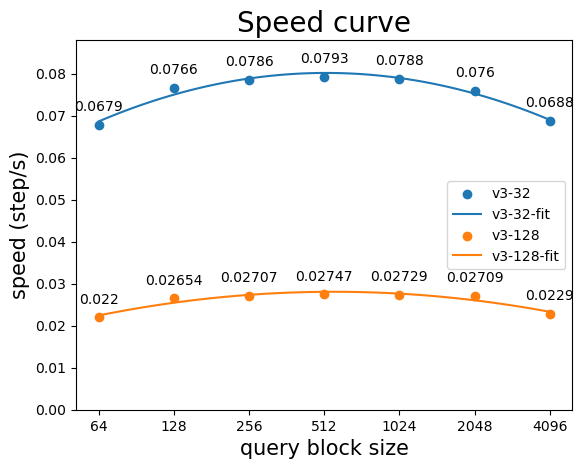

In [4]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


xlabels = ['64', '128', '256', '512', '1024', '2048', '4096']
x = range(len(xlabels))
y = [0.0679, 0.0766, 0.0786, 0.0793, 0.0788, 0.076, 0.0688]
y1 = [0.0220, 0.02654, 0.02707, 0.02747, 0.02729, 0.02709, 0.0229]

coefficients = np.polyfit(x, y, 2) # 2表示2次项拟合
p = np.poly1d(coefficients)
x_fit = np.linspace(min(x), max(x), 100)
y_fit = p(x_fit)

coefficients = np.polyfit(x, y1, 2) # 2表示2次项拟合
p = np.poly1d(coefficients)
x_fit1 = np.linspace(min(x), max(x), 100)
y_fit1 = p(x_fit1)

fig, ax = plt.subplots()

ax.scatter(xlabels, y)
ax.plot(x_fit, y_fit)

ax.scatter(xlabels, y1)
ax.plot(x_fit1, y_fit1)

# 在该点上标记其值
for index_to_label in range(len(x)):
    plt.annotate(f'{y[index_to_label]}',
                 (x[index_to_label], y[index_to_label]),
                 textcoords="offset points", xytext=(0,10), ha='center')

    plt.annotate(f'{y1[index_to_label]}',
                 (x[index_to_label], y1[index_to_label]),
                 textcoords="offset points", xytext=(0,10), ha='center')

ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels)
# ax.set_xlim(-1, 7)
ax.set_ylim(0, 0.088)

ax.set_title('Speed curve', fontsize=20)
ax.set_xlabel('query block size', fontsize=15)
ax.set_ylabel('speed (step/s)', fontsize=15)
ax.legend(['v3-32', 'v3-32-fit', 'v3-128', 'v3-128-fit'], loc='right')

plt.show()


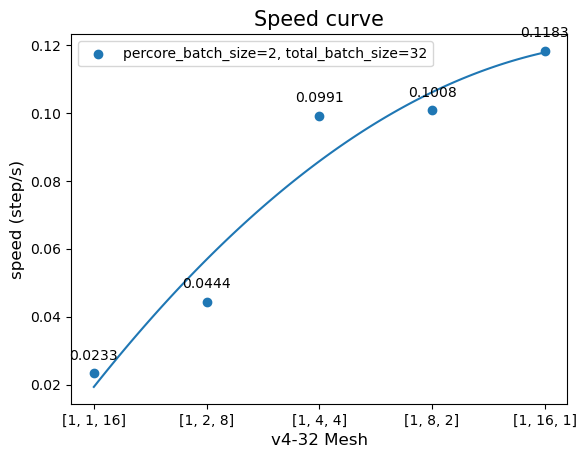

In [12]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


xlabels = ['[1, 1, 16]', '[1, 2, 8]', '[1, 4, 4]', '[1, 8, 2]', '[1, 16, 1]']

x = range(len(xlabels))
y = [0.0233, 0.0444, 0.0991, 0.1008, 0.1183]

coefficients = np.polyfit(x, y, 2) # 2表示2次项拟合
p = np.poly1d(coefficients)
x_fit = np.linspace(min(x), max(x), 100)
y_fit = p(x_fit)

fig, ax = plt.subplots()

ax.scatter(xlabels, y)
ax.plot(x_fit, y_fit)


# 在该点上标记其值
for index_to_label in range(len(x)):
    plt.annotate(f'{y[index_to_label]}',
                 (x[index_to_label], y[index_to_label]),
                 textcoords="offset points", xytext=(0,10), ha='center')

ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels)
# ax.set_xlim(-1, 7)
# ax.set_ylim(0, 0.030)

ax.set_title('Speed curve', fontsize=15)
ax.set_xlabel('v4-32 Mesh', fontsize=12)
ax.set_ylabel('speed (step/s)', fontsize=12)
ax.legend(['percore_batch_size=2, total_batch_size=32'], loc='upper left')

plt.show()
